# Jupyter Notebook for GEDI and ALS data analysis

This is a jupyter Notebook used for ALS and GEDI data analysis. The dataset was created by computing structural variability metrics for both GEDI and ALS data. In addition, terrain characteristics like slope and tree density are included in the dataset to evaluate their impact with regards to accuracy.
Last status: 02.01.2022 (v1)

In [ ]:
# First, load all necessary packages
library(readr)
library(corrmorant)
library(ggplot2)
library(rmarkdown)

In [6]:
# Set your working directory
myDirectory <- "E:/00_PhD_Ökosystemdynamik/P1/_R_scripts"

# set your working directory
setwd(myDirectory)

# assign an output directory
outdir <- myDirectory

The following dataset contains in total 7 structural variability metrics as well as some terrain characteristics like slope and tree density. These variables are used to evaluate their impact on accuracy. 

In [7]:
# Load dataset containing the metrics and show it
metrics <- read_csv("E:/00_PhD_Ökosystemdynamik/P1/_data/ALS_GEDI_terrain_cleaned.csv")
metrics

Rows: 936 Columns: 16

-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): slope, CH, CC, TD
dbl (12): FHD ALS, RH50 ALS, RH98 ALS, VDR ALS, VAI ALS, CC ALS, FHD GEDI, R...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



FHD ALS,RH50 ALS,RH98 ALS,VDR ALS,VAI ALS,CC ALS,FHD GEDI,RH50 GEDI,RH98 GEDI,VDR GEDI,VAI GEDI,CC GEDI,slope,CH,CC,TD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0.7433511,1.7030,18.98375,0.9102917,0.97979892,45.0524191,1.9080853,0.18,5.80,0.9689655,0.148611903,0.071611539,flat,low,high,low
0.6993102,1.0760,5.58020,0.8071754,0.44734244,37.9937885,1.6068299,0.00,5.20,1.0000000,0.034045547,0.016878659,flat,low,medium,medium
0.5861588,0.1910,4.46655,0.9572377,0.25530556,22.7261761,0.6365142,0.00,3.89,1.0000000,0.010849620,0.005410118,flat,low,medium,low
0.6898458,1.4010,8.75980,0.8400648,0.85483409,46.7625427,2.1045098,0.48,7.64,0.9371728,0.304588079,0.141260862,flat,low,high,medium
0.1276938,0.1380,0.87000,0.8413793,0.03204059,2.0650692,0.8809365,0.00,6.44,1.0000000,0.007565574,0.003775639,medium,low,low,low
0.1467066,0.1290,1.23000,0.8951220,0.06888197,3.0314622,1.0014586,0.00,5.65,1.0000000,0.004238395,0.002116953,medium,low,low,low
0.6088974,1.1400,2.90000,0.6068966,0.08862417,23.3542736,2.7429910,9.06,17.37,0.4784111,3.450579405,0.821711898,steep,low,medium,low
0.7232293,2.2970,11.20270,0.7949601,0.86361805,66.6146833,2.7378559,5.80,17.00,0.6588235,1.820719242,0.597545564,steep,low,high,medium
0.7415667,1.6320,4.28855,0.6194518,0.42833337,45.8667419,3.1782107,12.54,27.07,0.5367566,3.594134092,0.834041834,steep,low,high,medium


Some of the metrics do not have the same value range. This may not be disturbin for correlation analysis, but it is for creating scatter plots. Thus, the value range of FHD for GEDI data is normalized with following function:

In [8]:
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
metrics$`FHD GEDI`<-normalize(metrics$`FHD GEDI`)

Now, a basic cormorrant plot is created. Additionally, plots are grouped by slope, so that the impact of slope can be determined. Slope was reclassified like this:
* Slope <= 15° == "flat"
* Slope > 15° || <= 40° == "medium"
* Slope > 40° == "steep"

Correlation matrix contains 12 numeric variables:
Plotting may take very long.


Some variables are highly skewed (abs(skew) > 1).
Consider transformation for better display.

`geom_smooth()` using formula 'y ~ x'



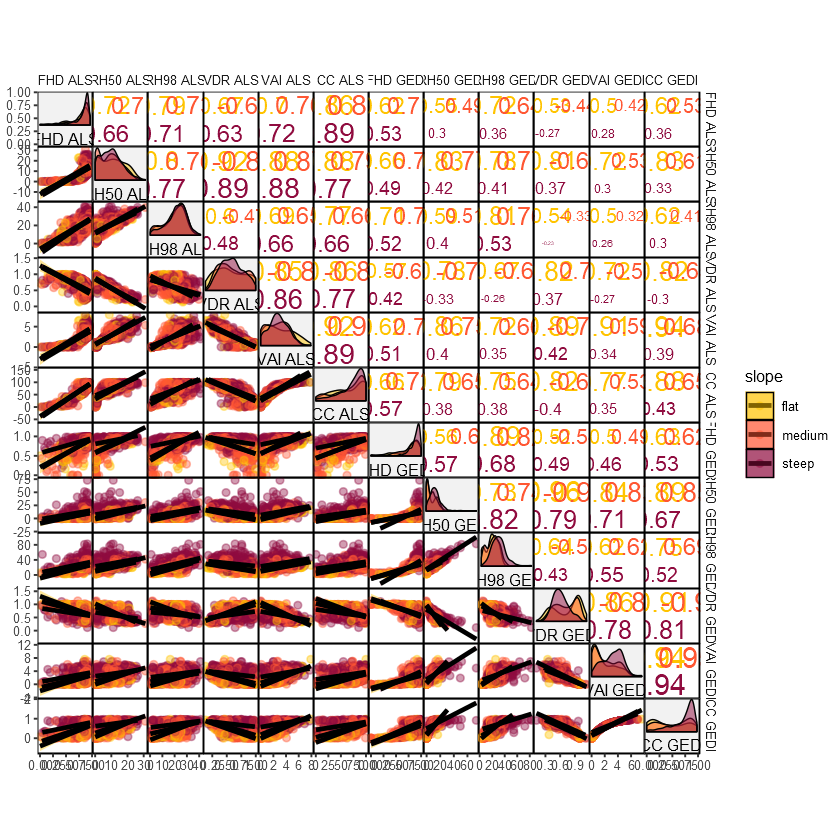

In [9]:
cols <- c("#FFC300", "#FF5733", "#900C3F")

corr_slope <- ggcorrm(metrics, aes(col = slope, fill = slope),
        rescale = "as_is", bg_dia = "grey95") +
  lotri(geom_point(alpha = 0.4)) +
  lotri(geom_smooth(col = 1, method = "lm"))  +
  utri_corrtext(nrow = 2) +
  dia_density(col = 1, alpha = 0.5, lower = 0.4) +
  dia_names(y_pos = 0.15) +
  scale_color_manual(values = cols) +
  scale_fill_manual(values =cols)
corr_slope

Next, a scatter plot shows the relationship between a metric derived from ALS and from GEDI, again grouped by slope. Here, we use RH98. 
Note: Maybe it would be cool do create a facet plot showing scatters for all metrics and for all terrain characteristics *tbd*

`geom_smooth()` using formula 'y ~ x'



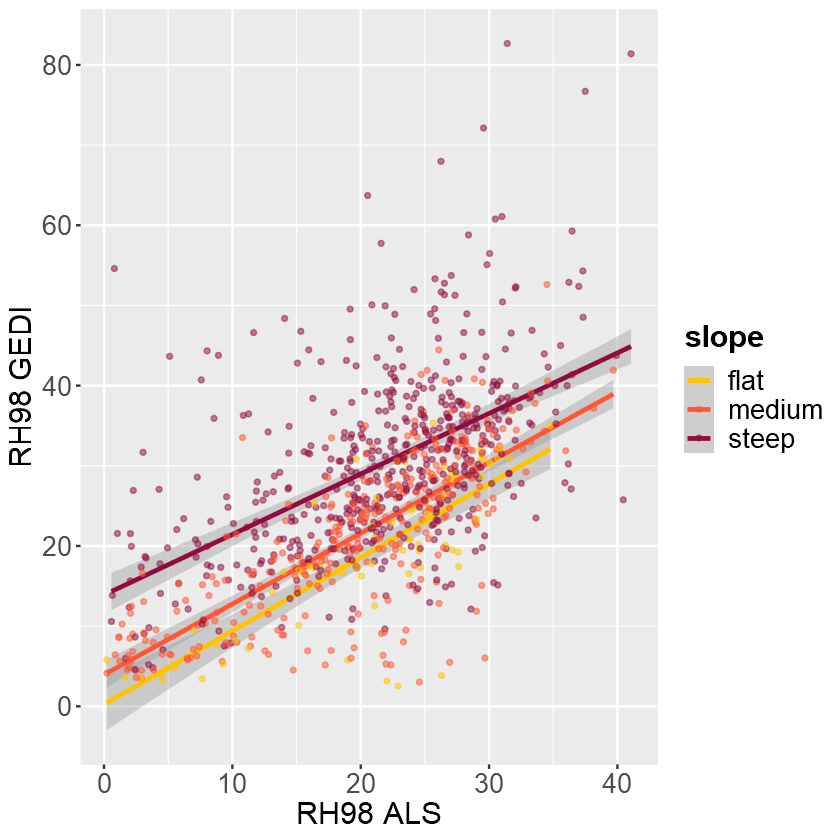

In [13]:
scatter_slope <- ggplot(metrics, aes(x = `RH98 ALS`, y = `RH98 GEDI`, color = slope)) +
  geom_smooth(method="lm") +
  geom_point(size = 1, alpha=0.5) +
  scale_color_manual(values = cols) +
  theme(axis.title.x = element_text(size=18),
        axis.title.y = element_text(size=18),
        axis.text.x  = element_text(size=16),
        axis.text.y  = element_text(size=16)) +
  theme(legend.title = element_text(size=18, face="bold")) +
          theme(legend.text = element_text(size = 16))
scatter_slope

The next two plots show again a correlation matrix and a scatterplot, but this time grouped by tree density (TD). TD was computed by applying a kernel over a individual tree segmentation (local maxima within a certain search radius). It turned out, that TD is more sensitive than canopy cover (CC).

Correlation matrix contains 12 numeric variables:
Plotting may take very long.


Some variables are highly skewed (abs(skew) > 1).
Consider transformation for better display.

`geom_smooth()` using formula 'y ~ x'



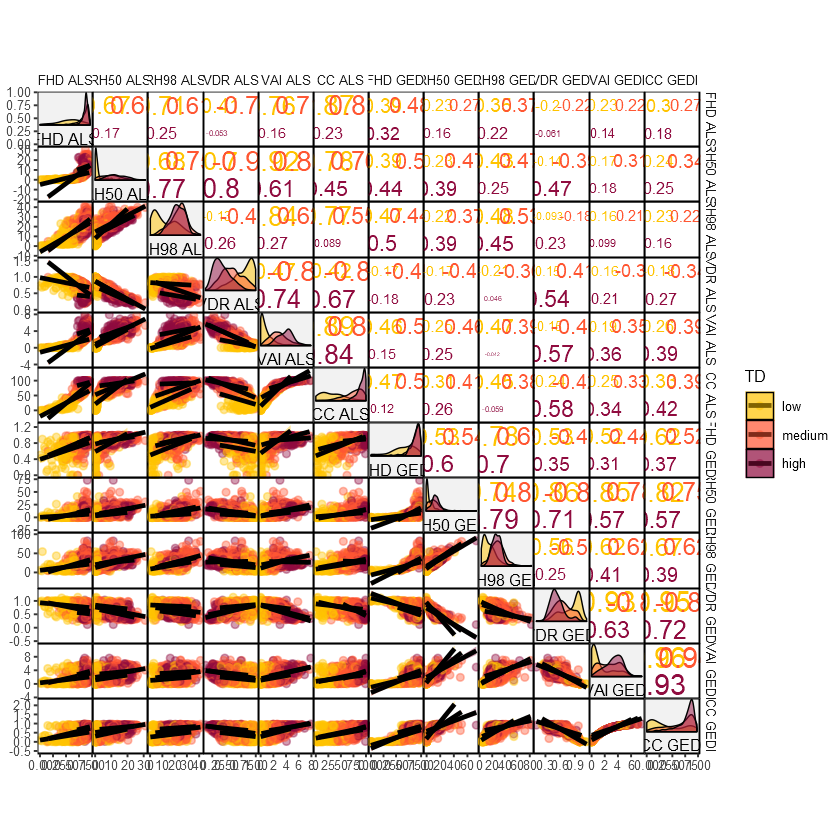

In [14]:
# Correlation plot; grouping by TD
metrics$TD <- factor(metrics$TD, levels = c("low", "medium", "high"))

corr_TD <- ggcorrm(metrics, aes(col = TD, fill = TD),
                 rescale = "as_is", bg_dia = "grey95") +
  lotri(geom_point(alpha = 0.4)) +
  lotri(geom_smooth(col = 1, method = "lm"))  +
  utri_corrtext(nrow = 2) +
  dia_density(col = 1, alpha = 0.5, lower = 0.4) +
  dia_names(y_pos = 0.15) +
  scale_color_manual(values = cols) +
  scale_fill_manual(values =cols)
corr_TD

List of 2
 $ legend.title:List of 11
  ..$ family       : NULL
  ..$ face         : chr "bold"
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ legend.text :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 16
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

`geom_smooth()` using formula 'y ~ x'



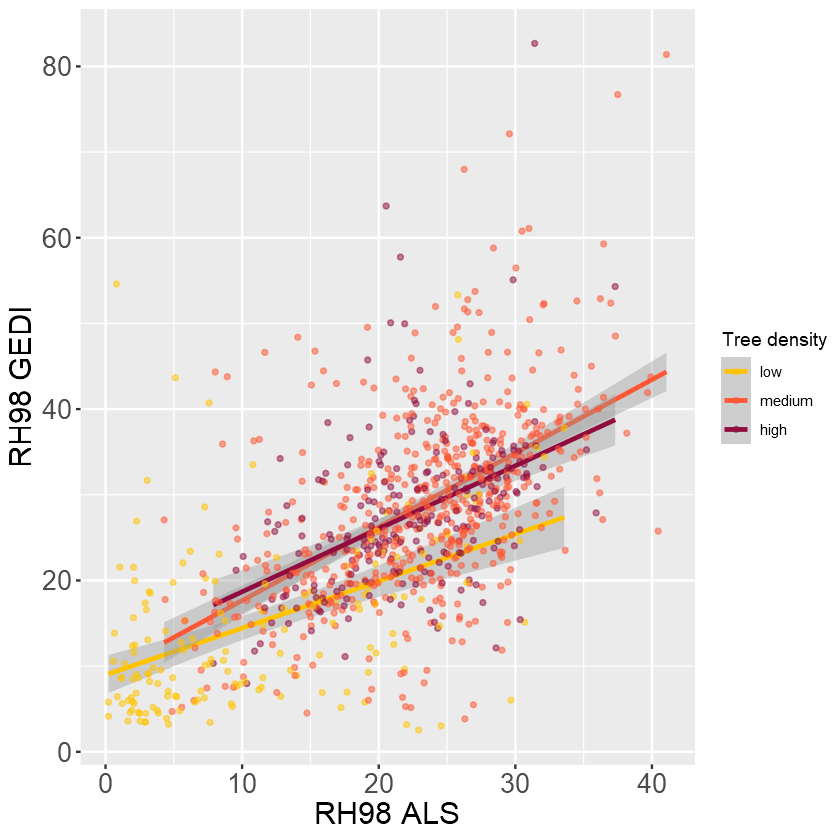

In [15]:
# Scatter plot, grouping by TD
scatter_TD <- ggplot(metrics, aes(x = `RH98 ALS`, y = `RH98 GEDI`, color = TD)) +
  geom_smooth(method="lm") +
  geom_point(size = 1, alpha=0.5) +
  scale_colour_manual(values = cols, name="Tree density", breaks=c("low", "medium", "high")) +
  theme(axis.title.x = element_text(size=18),
        axis.title.y = element_text(size=18),
        axis.text.x  = element_text(size=16),
        axis.text.y  = element_text(size=16)) 
  theme(legend.title = element_text(size=18, face="bold")) +
  theme(legend.text = element_text(size = 16))
scatter_TD